In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def plot_norm_dist(norm_dist, title="Empirical Rule", subtitle="(Normal distribution)",
                   title_size=20, subtitle_size=12, n_sd=4, file_name="normal_distribution.png",
                   annotations=True, save_plot=False):
    """
    This function plots the normal distribution density curve with empirical rule annotations.
    """
    # Calculate mean and standard deviation
    m = np.round(np.mean(norm_dist), 2)
    sd = np.round(np.std(norm_dist), 2)

    # Create a range of x values from the mean and standard deviation
    x = np.linspace(m - n_sd*sd, m + n_sd*sd, 1000)

    # Plot the normal distribution curve
    plt.figure(figsize=(12, 6))
    plt.plot(x, norm.pdf(x, m, sd), linewidth=3)
    plt.title(f"{title}\n{subtitle}", fontsize=title_size)
    plt.text(m, norm.pdf(m, m, sd), f'$\mu={m},\ \sigma={sd}$', fontsize=12, ha='center')
    plt.xticks([])
    plt.yticks([])
    
    if annotations:
        # Add vertical lines and annotations for mean and standard deviations
        for i in range(-n_sd, n_sd+1):
            plt.axvline(x=m+i*sd, color='grey', linestyle='--', linewidth=1)
            if i != 0:
                plt.text(m+i*sd, 0, f'$\mu{+i if i > 0 else i}\sigma$', color='black', ha='center')
        
        # Add percentage text boxes
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(m, norm.pdf(m, m, sd)*1.1, '68%', fontsize=12, ha='center', bbox=props)
        plt.text(m-sd, norm.pdf(m-sd, m, sd)*1.1, '13.5%', fontsize=12, ha='center', bbox=props)
        plt.text(m+sd, norm.pdf(m+sd, m, sd)*1.1, '13.5%', fontsize=12, ha='center', bbox=props)
        plt.text(m-2*sd, norm.pdf(m-2*sd, m, sd)*1.1, '2.35%', fontsize=12, ha='center', bbox=props)
        plt.text(m+2*sd, norm.pdf(m+2*sd, m, sd)*1.1, '2.35%', fontsize=12, ha='center', bbox=props)
    
    # Optionally save the plot
    if save_plot:
        plt.savefig(file_name, dpi=125)
    
    plt.show()

In [3]:
# Set mean and standard deviation
m = 0
sd = 1

# Number of random samples
n = 1000000

# Simulate sampling from normal distribution using numpy
np.random.seed(1)
norm_dist = np.random.normal(loc=m, scale=sd, size=n)

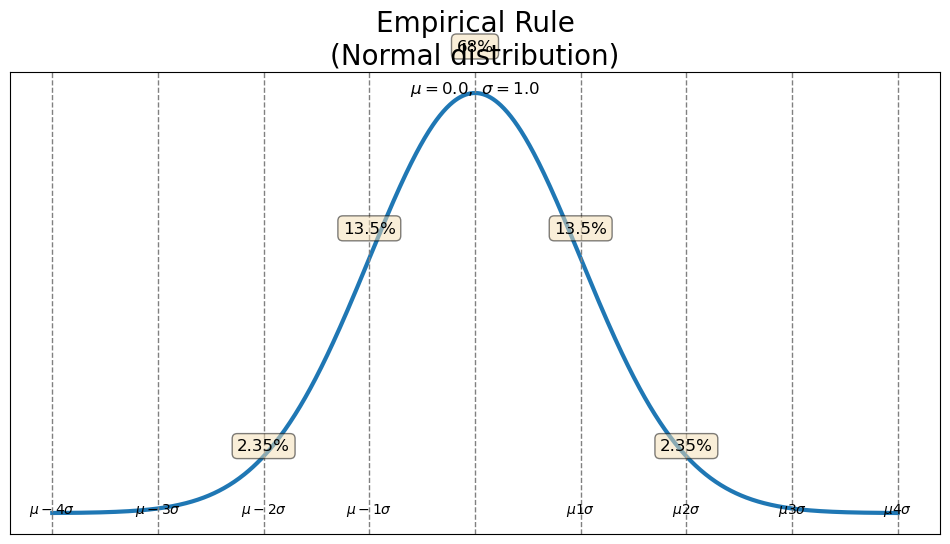

In [4]:
# Plot
plot_norm_dist(norm_dist=norm_dist, annotations=True)